In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [ ]:
stable = True # Set to True for latest pip version or False for main branch in GitHub
!pip install {"tsai -U" if stable else "git+https://github.com/timeseriesAI/tsai.git"} >> /dev/null

*For End-term the team should do the following: -- try different thresholds -- try relationships -- universal decision -- combining atemporal decision with temporal decision -- two new timeseries classification datasets*

In [ ]:
from tsai.all import *
import sklearn.metrics as skm
my_setup()

os              : Linux-6.1.58+-x86_64-with-glibc2.35
python          : 3.10.12
tsai            : 0.3.9
fastai          : 2.7.15
fastcore        : 1.5.33
torch           : 2.2.1+cu121
device          : cpu
cpu cores       : 1
threads per cpu : 2
RAM             : 12.67 GB
GPU memory      : N/A


In [ ]:
dsid = 'NATOPS'
X, y, splits = get_UCR_data(dsid, return_split=False)
X.shape, y.shape, splits

# # dataset id
# dsid ='Cricket'       #'Heartbeat'
# X, y, splits = get_UCR_data(dsid, return_split=False)
# X.shape, y.shape, splits

((360, 24, 51),
 (360,),
 ((#180) [0,1,2,3,4,5,6,7,8,9...],
  (#180) [180,181,182,183,184,185,186,187,188,189...]))

In [ ]:
np.unique(y)

array(['1.0', '2.0', '3.0', '4.0', '5.0', '6.0'], dtype='<U3')

In [ ]:
# import numpy as np

# # Assuming 'features' is your 3D array of features and 'y' is your list of target values

# # Create an array of indices
# indices = np.arange(len(y))

# # Shuffle the indices
# np.random.shuffle(indices)

# # Use the shuffled indices to shuffle the features and target values
# shuffled_features = X[indices]
# shuffled_y = [y[i] for i in indices]

In [ ]:
len(y)

360

In [ ]:
target_values = []
indexes = []
for i in range(len(y)):
  if y[i] == '1.0':
    target_values.append(1)
    indexes.append(i)
  if y[i] == '2.0':
    target_values.append(2)
    indexes.append(i)
  if y[i] == '3.0':
    target_values.append(3)
    indexes.append(i)
  if y[i] == '4.0':
    target_values.append(4)
    indexes.append(i)

  else:
    pass


In [ ]:
np.unique(target_values)

array([1, 2, 3, 4])

In [ ]:
len(target_values)

240

In [ ]:
data = X[indexes]

##**multiple feature and multilabel**

In [ ]:
data = data[:,:3,:30]

In [ ]:

data.shape

(240, 3, 30)

In [ ]:
train_data = data[:75]  #90
train_y = target_values[:75]
test_data = data[75:100]
test_y = target_values[75:100]

In [ ]:
np.unique(train_y[:75],return_counts=True)

(array([1, 2, 3, 4]), array([17, 19, 22, 17]))

In [ ]:
train_data.shape

(75, 3, 30)

In [ ]:
len(train_y)

75

In [ ]:
test_data.shape

(25, 3, 30)

In [ ]:
len(test_y)

25

In [ ]:
num_samples = train_data.shape[0]  # Get the number of samples
unique_values_array = []  # Initialize an empty list to store unique values for each sample

for i in range(num_samples):
    sample = train_data[i, :]  # Extract the i-th sample
    rounded_sample = np.round(sample, 2)  # Round the sample values to two decimal places
    #print(rounded_sample)
    unique_values = np.unique(rounded_sample)  # Find the unique rounded values for the current sample
    unique_values_array.append(unique_values)
uniq_values = []
for row in unique_values_array:
  uniq_values.extend(list(row))

In [ ]:
#num_samples

In [ ]:
target_values[:20]

[4, 3, 3, 4, 3, 1, 3, 2, 1, 4, 3, 2, 3, 2, 2, 4, 3, 4, 1, 3]

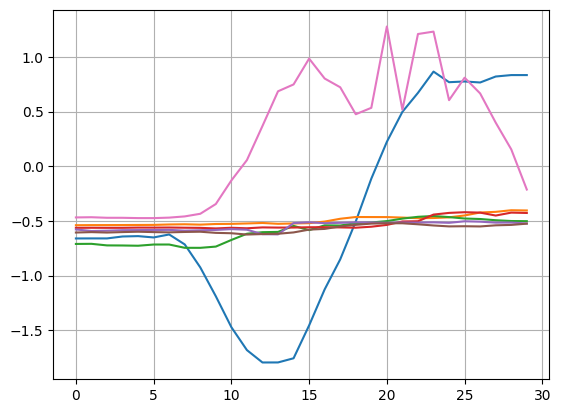

In [ ]:
for i in range(9,16):
    plt.plot(data[i][0][:])
plt.grid(True)
plt.show()

##**Functions**

In [ ]:
def allen_relation(interval1, interval2):
    x, y = interval1
    a, b = interval2

    if y == a:
        return "A"  # after
    elif y < a:
        return "L"  # later
    elif x == a and b < y:
        return "B"  # begins
    elif y == b and x < a:
        return "E"  # ends
    elif x < a and b < y:
        return "D"  # during
    elif x < a < y < b:
        return "O"  # overlaps
    elif x == a and y < b:
        return "B_complement"  # begins in
    elif x > a and y < b:
        return "D_complement"  # during in
    elif a < x and b == y:
        return "E_complement"  # ends in
    elif a < x and x == b :
        return "A_complent"  # during begins
    elif a < b < x < y:
        return "L_complement"  # ends begins
    elif a< x < y < b:
        return "O_complement"  # ends overlaps
    else:
        return "No relation"

#old

# def check_values_greater_than_threshold(lst, threshold, percentage):
#     count_greater = sum(1 for value in lst if value > threshold)
#     return count_greater / len(lst) >= percentage

#new

# def check_values_greater_than_threshold(lst, threshold, percentage):
#     if len(lst) == 0:  # Check if the list is empty
#         return False  # If the list is empty, return False

#     count_greater = sum(1 for value in lst if value > threshold)
#     print(count_greater)
#     return count_greater / len(lst) >= percentage if len(lst) > 0 else False  # Check if the condition holds



def check_values_greater_than_threshold(lst, threshold, percentage):
    if len(lst) == 0:  # Check if the list is empty
        return False  # If the list is empty, return False

    if isinstance(lst, np.ndarray):  # Check if lst is a NumPy array
        count_greater = np.sum(lst > threshold)  # Use NumPy's sum function for arrays
    else:
        count_greater = sum(1 for value in lst if value > threshold)  # Use regular sum function for lists

    return count_greater / len(lst) >= percentage if len(lst) > 0 else False  # Check if the condition holds

def check_values_less_than_threshold(lst, threshold, percentage):
    if len(lst) == 0:  # Check if the list is empty
        return False  # If the list is empty, return False

    if isinstance(lst, np.ndarray):  # Check if lst is a NumPy array
        count_less = np.sum(lst < threshold)  # Use NumPy's sum function for arrays
    else:
        count_less = sum(1 for value in lst if value < threshold)  # Use regular sum function for lists

    return count_less / len(lst) >= percentage if len(lst) > 0 else False  # Check if the condition holds




def generate_all_intervals(t):
    intervals = []
    for start in range(t - 7):  # Ensure the interval has 9 timestamps
        intervals.append((start, start + 8))
    return intervals

relations = ["A","L","B","E","D","O","B_complement","D_complement","E_complement","A_complent","L_complement","O_complement"]
thresholds = uniq_values

In [ ]:
# # Example usage
# my_list = [10, 15, 20, 25,30]
# threshold = 15

# # my_list = []
# # threshold = 1
# required_percentage = 0.6  # 60%

In [ ]:
# check_values_greater_than_threshold(my_list, threshold, required_percentage)

In [ ]:
class Node:
    def __init__(self, threshold=None,interval = None,relation =None, left=None, right=None, value=None):
        self.threshold = threshold
        self.interval = interval
        self.relation = relation
        self.left = left
        self.right = right
        self.value = value
def gini_impurity(y):
    _, counts = np.unique(y, return_counts=True)
    probs = counts / len(y)
    return - np.sum(probs*np.log(probs))   #(1-sum(p1^2+p2^2))

def information_gain(y, y_left, y_right):

    p = len(y_left) / len(y)
    gini_parent = gini_impurity(y)
    gini_children = p * gini_impurity(y_left) + (1 - p) * gini_impurity(y_right)
    return gini_parent - gini_children


def generate_all_intervals(t):
    intervals = []
    for start in range(t - 7):  # Ensure the interval has 9 timestamps
        intervals.append((start, start + 8))
    return intervals

def findBestDecision_and_split(data, target_values,possible_intervals):
    best_feature = None
    best_threshold = None
    best_interval = None
    max_information_gain = -1
    best_relation = None
    Te = None  # left node for greater than threshold
    Tu = None  # right node for greater than threshold
    com_operators = None
    left_target = None
    right_target = None

    for feature in range(data.shape[1]):
      unique_values_array = []
      for i in range(data.shape[0]):
          sample = data[i,feature, :]  # Extract the i-th sample
          unique_values = np.unique(sample)  # Find the unique  values for the current sample
          unique_values_array.append(unique_values)
          thresholds = []
          for row in unique_values_array:
              thresholds.extend(list(row))

      for i in range(len(possible_intervals)):

            ref_interval = possible_intervals[i]


            for relation in relations:

              after_intervals = [(a, b) for a, b in possible_intervals if allen_relation(ref_interval, (a, b)) == relation] #its give the interval


            for threshold in thresholds:

                left_data_greater = []
                left_y_greater = []
                right_data_greater = []
                right_y_greater = []

                left_data_less = []
                left_y_less = []
                right_data_less = []
                right_y_less = []

                for i in range(len(data)):

                    int_values = [data[i][feature][interval[0]:interval[1] + 1] for interval in after_intervals] #it give the interval value

                    if any(check_values_greater_than_threshold(lst, threshold, 0.65) for lst in int_values):
                        left_data_greater.append(data[i])
                        left_y_greater.append(target_values[i])
                    else:
                        right_data_greater.append(data[i])
                        right_y_greater.append(target_values[i])

                    if any(check_values_less_than_threshold(lst, threshold, 0.65) for lst in int_values):
                        left_data_less.append(data[i])
                        left_y_less.append(target_values[i])
                    else:
                        right_data_less.append(data[i])
                        right_y_less.append(target_values[i])

                inf_gain_greater = information_gain(target_values, left_y_greater, right_y_greater)
                inf_gain_less = information_gain(target_values, left_y_less, right_y_less)

                if inf_gain_greater > max_information_gain:
                    best_feature  = feature
                    best_threshold = threshold
                    best_interval = ref_interval
                    max_information_gain = inf_gain_greater
                    best_relation = relation
                    Te = left_data_greater  # left node for greater than threshold
                    Tu = right_data_greater  # right node for greater than threshold
                    com_operators = 'Greater than'
                    left_target = left_y_greater
                    right_target = right_y_greater

                if inf_gain_less > max_information_gain:
                    best_threshold = threshold
                    best_interval = ref_interval
                    max_information_gain = inf_gain_less
                    best_relation = relation
                    Te = left_data_less  # left node for greater than threshold
                    Tu = right_data_less  # right node for greater than threshold
                    com_operators = 'Less than'
                    left_target = left_y_less
                    right_target = right_y_less

    return best_feature,best_interval, best_threshold, best_relation, np.array(Te),np.array(Tu),left_target,right_target,com_operators,max_information_gain


In [ ]:
relations = ["A","L","B","E","D","O","B_complement","D_complement","E_complement","A_complent","L_complement","O_complement"]

In [ ]:
# possible_intervals=generate_all_intervals(10)

In [ ]:
# ref_interval = possible_intervals[1]

In [ ]:
# after_intervals = [(a, b) for a, b in possible_intervals if allen_relation(ref_interval, (a, b)) == "A"]

In [ ]:
# int_values = [data[4][interval[0]:interval[1]+1] for interval in after_intervals]

In [ ]:
# findBestDecision_and_split(data, target_values,possible_intervals = generate_all_intervals(10))

In [ ]:
def CreateLeafNode(target_values):
    if len(target_values) == 0:
        # Return a default value when target_values is empty
        return Node(value = None)
    else:
        # Return the most common target value
        return Node(value=np.argmax(np.bincount(list(target_values))))

def CreateNode(data):
    return Node()

def Learn(data,target_values,possible_intervals=generate_all_intervals(30),max_depth=8, current_depth=0):

    if len(target_values) == 0 :
        return CreateLeafNode(target_values)
    if len(np.unique(target_values)) == 1 or max_depth <= current_depth or possible_intervals ==[] or relations ==[] :
        return CreateLeafNode(target_values)


    best_feature,best_interval, best_threshold, best_relation, Te,Tu,left_target,right_target,com_operators,max_information_gain = findBestDecision_and_split(data, target_values,possible_intervals=generate_all_intervals(30))

    node = CreateNode(data)

    node.threshold = best_threshold
    node.interval = best_interval
    node.relation = best_relation
    #node.value = np.argmax(np.bincount(list(target_values)))

    print(Te.shape,left_target)
    print(Tu.shape,right_target)
    print(best_feature,best_interval,best_relation,best_threshold,com_operators )
    # print('___________________________________________________')



    node.left = Learn(Te,left_target,possible_intervals = possible_intervals ,max_depth = 8,current_depth = current_depth + 1)
    node.right = Learn(Tu,right_target,possible_intervals = possible_intervals,max_depth = 8 ,current_depth = current_depth+1)

    return node

def TCART(data,target_values,possible_intervals,relations):

    tau = Node()

    tau = Learn(data,target_values,possible_intervals,max_depth=8, current_depth=0)
    return tau

In [ ]:
possible_intervals = generate_all_intervals(30)

In [ ]:
tree  = TCART(train_data,train_y,possible_intervals = generate_all_intervals(30) ,relations=["A","L","B","E","D","O","B_complement","D_complement","E_complement","A_complent","L_complement","O_complement"])

(0,) []
(75, 3, 30) [4, 3, 3, 4, 3, 1, 3, 2, 1, 4, 3, 2, 3, 2, 2, 4, 3, 4, 1, 3, 3, 3, 4, 3, 1, 4, 3, 4, 4, 1, 2, 1, 1, 4, 1, 3, 3, 2, 1, 1, 2, 4, 2, 1, 3, 1, 2, 1, 3, 4, 4, 3, 2, 2, 3, 3, 1, 2, 2, 2, 4, 4, 2, 3, 1, 3, 1, 4, 2, 1, 2, 2, 2, 4, 3]
0 (0, 8) O_complement -2.133169 Greater than
(0,) []
(75, 3, 30) [4, 3, 3, 4, 3, 1, 3, 2, 1, 4, 3, 2, 3, 2, 2, 4, 3, 4, 1, 3, 3, 3, 4, 3, 1, 4, 3, 4, 4, 1, 2, 1, 1, 4, 1, 3, 3, 2, 1, 1, 2, 4, 2, 1, 3, 1, 2, 1, 3, 4, 4, 3, 2, 2, 3, 3, 1, 2, 2, 2, 4, 4, 2, 3, 1, 3, 1, 4, 2, 1, 2, 2, 2, 4, 3]
0 (0, 8) O_complement -2.133169 Greater than
(0,) []
(75, 3, 30) [4, 3, 3, 4, 3, 1, 3, 2, 1, 4, 3, 2, 3, 2, 2, 4, 3, 4, 1, 3, 3, 3, 4, 3, 1, 4, 3, 4, 4, 1, 2, 1, 1, 4, 1, 3, 3, 2, 1, 1, 2, 4, 2, 1, 3, 1, 2, 1, 3, 4, 4, 3, 2, 2, 3, 3, 1, 2, 2, 2, 4, 4, 2, 3, 1, 3, 1, 4, 2, 1, 2, 2, 2, 4, 3]
0 (0, 8) O_complement -2.133169 Greater than
(0,) []
(75, 3, 30) [4, 3, 3, 4, 3, 1, 3, 2, 1, 4, 3, 2, 3, 2, 2, 4, 3, 4, 1, 3, 3, 3, 4, 3, 1, 4, 3, 4, 4, 1, 2, 1, 1, 4, 1, 3

In [ ]:
def predict(node, sample):
    if node.value is not None:

        return node.value

    threshold = node.threshold
    interval = node.interval
    relation = node.relation
    left = node.left
    right = node.right
   # value = node.value

    after_intervals = [(a, b) for a, b in possible_intervals if allen_relation(interval, (a, b)) == relation]
    int_values = [sample[interval[0]:interval[1]+1] for interval in after_intervals]
    # Check if 75% of values are greater than the threshold
    if any(check_values_greater_than_threshold(lst, threshold, 0.75) for lst in int_values):
        return predict(left, sample)
    # Check if 75% of values are less than the threshold
    elif any(check_values_less_than_threshold(lst, threshold, 0.75) for lst in int_values):
        return predict(right, sample)
    else:
        # Default action if neither condition is met
        return None  # or return a default value

    # if any(check_values_greater_than_threshold(lst,threshold, 0.75) for lst in int_values):
    #     return predict(node.left, sample)
    # else:
    #     return predict(node.right, sample)

    # if any(check_values_less_than_threshold(lst, threshold, 0.75) for lst in int_values):
    #     return predict(node.left, sample)
    # else:
    #     return predict(node.right,sample)

In [ ]:
predictions = []

# Iterate over each sample in the test data
for sample in test_data:
    # Predict the target variable for the sample using the decision tree 'tau'
    predicted_value = predict(tree,sample)
    predictions.append(predicted_value)

# Convert predictions to a numpy array
predictions = np.array(predictions)

# Print the predictions
print("Predictions:", predictions)

Predictions: [None None None None None None None None None None None None None None
 None None None None None None None None None None None]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y, predictions)
print("Accuracy:", accuracy)

ValueError: Classification metrics can't handle a mix of multiclass and unknown targets

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Assuming test_y represents the true labels and predictions represents the predicted labels

# Compute Precision
precision = precision_score(test_y, predictions, average='weighted')  # Use 'weighted' averaging

# Compute Sensitivity (Recall)
sensitivity = recall_score(test_y, predictions, average='weighted')  # Use 'weighted' averaging

# Compute Specificity from the confusion matrix
tn, fp, fn, tp = confusion_matrix(test_y, predictions).ravel()
specificity = tn / (tn + fp)


In [ ]:
print('Precision : ',precision)
print('Sensitivity : ',sensitivity)
print('Specificity : ',specificity)

##**TRF**

In [ ]:
from sklearn.utils import resample

In [ ]:
import numpy as np
from sklearn.utils import resample

def subset_sample(T_features, T_target, m):
    indices = resample(range(len(T_features)), replace=True, n_samples=m)
    features_sampled = [T_features[i] for i in indices]
    target_sampled = [T_target[i] for i in indices]
    return features_sampled, target_sampled

def TRF(T,T_target,possible_intervals,k,nlan , m):
    F = []

    for i in range(k):
        data , target_values = subset_sample(T,T_target, m)
        tau = TCART(data,target_values,possible_intervals = generate_all_intervals(30) ,relations = nlan)  # Assuming CART is implemented elsewhere
        F.append(tau)

    return F



In [ ]:
relations = ["A","L","B","E","D","O","B_complement","D_complement","E_complement","A_complent","L_complement","O_complement"]
Random_forest = TRF(train_data,train_y,possible_intervals = generate_all_intervals(30) ,k = 5, nlan = relations , m = 40)

In [ ]:
predictions = []

# Iterate over each sample in the test data
for sample in test_data:
    # Predict the target variable for the sample using the decision tree 'tau'
    temp_predicted_value = [predict(decision_tree,sample) for decision_tree in Random_forest]
    predictions.append(np.argmax(np.bincount(list(temp_predicted_value)))) #bincount give value in an array of non-negative integers

# Convert predictions to a numpy array
predictions = np.array(predictions)

# Print the predictions
print("Predictions:", predictions)

In [ ]:
predictions1 = [0,0,1,0,1,1,0,0,1,1,0,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,1,0,1,1]

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y, predictions1)
print("Accuracy:", accuracy)

In [ ]:
precision1 = precision_score(test_y, predictions1)

# Compute Sensitivity (Recall)
sensitivity1 = recall_score(test_y, predictions1)

# Compute Specificity from the confusion matrix
tn, fp, fn, tp = confusion_matrix(test_y, predictions1).ravel()
specificity1 = tn / (tn + fp)

In [ ]:
print('Precision : ',precision1)
print('Sensitivity : ',sensitivity1)
print('Specificity : ',specificity1)